In [230]:
#pip install mysql-connector-python
import pandas as pd
import numpy as np
#import mysql.connector
#from mysql.connector import Error

import plotly.express as px
import plotly.io as pio

import plotly.express as px


from plotly.subplots import make_subplots
import plotly.graph_objects as go
#pip install -U kaleido




##Have marked todo and done

Need to give headings and add insights

1. There are nulls in "device_id" of events_data which should not be the case. done

2. There are nulls in "latitude" and "longitude".done

3. Some of the "latitudes" and "longitudes" are wrong. todo

4. "state" column of events_data has null values in the Database. Retrieve those rows and fill them appropriately.done

Once you have your Data preprocessed, it is ready to undergo Analysis.

Here is the Task for Week 3:
##TODO plotly thme change for color and bar width should be reduced
1. Do Analysis on the preprocessed Data.

Here are the points about how Analysis should be done:

1. Distribution of Users(device_id) across States. Todo pie

2. Distribution of Users across Phone Brands(Consider only 10 Most used Phone Brands).Todo horizotal bar

3. Distribution of Users across Gender.Todo piechart

4. Distribution of Users across Age Segments.Todo horizontal bar

5. Distribution of Phone Brands(Consider only 10 Most used Phone Brands) for each Age Segment, State, Gender. done

6. Distribution of Gender for each State, Age Segment and Phone Brand(Consider only 10 Most used Phone Brands). done

7. Distribution of Age Segments for each State, Gender and Phone Brand(Consider only 10 Most used Phone Brands). done


Note: While doing analysis for the above points, consider only one instance of a particular User(device_id) as a User can do multiple phone calls and considering every instance of the same User can give misleading numbers.

8. Hourly distribution of Phone Calls. take from Rghavendra

9. Plot the Users on the Map using any suitable package. Take from Ragavendra

In [250]:
raw_df = pd.read_csv('cap_df_final.csv')

print(raw_df.shape)
df2 = raw_df.drop_duplicates(subset=['device_id'], keep='first', inplace=False)

#bins = [5,16,25,30,35, 45, 50,60,90]

print(df2.shape)


(533515, 19)
(9538, 19)


D:\anaconda\instn\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



age_bins
(5, 20]      754
(20, 25]    2199
(25, 30]    2644
(30, 40]    2456
(40, 45]     585
(45, 60]     715
(60, 90]     185
Name: age_bins, dtype: int64


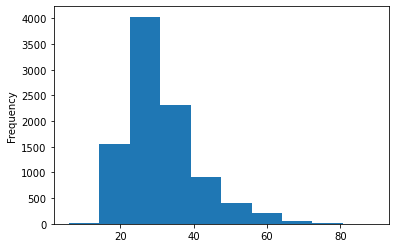

In [251]:
dfuniqdata=df2
bins = [5,20,25,30,40, 45,60,90]
dfuniqdata['age_bins'] = pd.cut(dfuniqdata['age'], bins)
dfuniqdata['age'].plot(kind='hist')
#dfuniqdata.info()
#df1.info()
df3 = dfuniqdata.groupby(['age_bins'])['age_bins'].count()
print (df3)

In [252]:
#5. Distribution of Phone Brands(Consider only 10 Most used Phone Brands) for each Age Segment, State, Gender.

#dfx5 = dfuniqdata.groupby(['age_bins','brand'])['brand'].count()
#dfx5.head(1000)
#dat = dfuniqdata['']
g = dfuniqdata.groupby(["age_bins"])
g.head()

#df_agg = dfuniqdata.groupby(['age_bins','brand'])['brand'].count().reset_index(name='count')
# get dataframe sorted by life Expectancy in each continent 
#g = dfuniqdata.groupby(["age_bins"]).apply(lambda x: x.sort_values(["brand"], ascending = False)).reset_index(drop=True)
# select top N rows within each continent
#a=g.groupby('age_bins').head(5)

#g.head(100)
                                         
#g.nlargest(3)
#df_agg.head(100)
#res = g.apply(lambda x: x.order(ascending=False).head(3))
#res.head()
#g = dfuniqdata.sort_values(['age_bins','brand'],ascending=False).groupby(['age_bins','brand']).head(3)
#g.head() 

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,event_id,device_id,timestamp,longitude,latitude,city,state,latlong,gender,age,group,phone_brand,device_model,brand,longlat,longitude1,age_bins
0,0,0,97304,3186309,7662139143719919126,2016-05-05 21:00:34,80.309272,13.149176,Chennai,TamilNadu,nannan,M,20,M22-,酷派,大神F1,Coolpad,80.3092719999999813.149176,80.309272,"(5, 20]"
21,21,21,16866,926804,7983871429718484702,2016-05-03 12:29:47,80.335435,13.189053,Chennai,TamilNadu,nannan,M,32,M32-38,酷派,大神F2全高清版,Coolpad,80.3354349999999813.189053,80.335435,"(30, 40]"
42,42,42,126652,918193,5731369272434022440,2016-05-04 04:35:06,80.343613,13.153332,Chennai,TamilNadu,nannan,M,26,M23-26,HTC,One max,HTC,80.3436129999999813.153332,80.343613,"(25, 30]"
126,126,126,736,460124,5536513450525271144,2016-05-01 21:30:10,80.359796,13.128174,Chennai,TamilNadu,80.35979613.128174,M,32,M32-38,小米,红米2,Xiaomi,80.35979613.128174,80.359796,"(30, 40]"
127,127,127,737,2921356,-4792366453774469421,2016-05-04 20:56:56,80.309010,13.114228,Chennai,TamilNadu,80.3090113.114228,M,43,M39+,小米,红米,Xiaomi,80.3090113.114228,80.309010,"(40, 45]"
131,131,131,741,1004771,8331888722038251159,2016-05-03 05:58:18,80.291743,13.145584,Chennai,TamilNadu,80.2917430000000313.145584,F,21,F23-,华为,荣耀畅玩4,Huawei,80.2917430000000313.145584,80.291743,"(20, 25]"
175,175,175,840,3219828,-3433061233631405742,2016-05-03 00:27:21,80.290779,13.115427,Chennai,TamilNadu,80.29077913.115426999999999,M,66,M39+,小米,红米note,Xiaomi,80.29077913.115427,80.290779,"(60, 90]"
177,177,177,845,998037,7594215820567965078,2016-05-03 20:59:09,80.306871,13.172970,Chennai,TamilNadu,80.30687113.172970000000001,F,27,F27-28,魅族,魅蓝NOTE,Meizu,80.30687113.17297,80.306871,"(25, 30]"
178,178,178,846,2906758,-2168523477348251699,2016-05-03 10:58:25,80.344605,13.169308,Chennai,TamilNadu,80.34460513.169308,F,42,F33-42,三星,S7568,Samsung,80.34460513.169308,80.344605,"(40, 45]"
179,179,179,849,2072637,3644267756307556227,2016-05-04 05:02:28,80.327388,13.179729,Chennai,TamilNadu,80.32738813.179729,M,28,M27-28,小米,MI 3,Xiaomi,80.32738813.179729,80.327388,"(25, 30]"


In [6]:

#ageb = list(set(g.age_bins))
            
            
#import plotly.express as px
#fig = px.bar(g, x="brand", y="count", color="smoker", barmode="group",facet_col="day",category_orders={"day": ageb})
#fig.show()

In [253]:
dfuniqdata['age_bins'] = dfuniqdata['age_bins'].apply(lambda x: str(x))

D:\anaconda\instn\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [254]:
dfg = dfuniqdata.groupby(['gender']).count().reset_index().sort_values(['city'],ascending=False)
g3=dfg.head(10)
g3

,gender,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,event_id,device_id,timestamp,longitude,latitude,city,state,latlong,age,group,phone_brand,device_model,brand,longlat,longitude1,age_bins
1,M,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976
0,F,3562,3562,3562,3562,3562,3562,3562,3562,3562,3562,3562,3562,3562,3562,3562,3562,3562,3562,3562


In [255]:
#Distribution of Users(device_id) across States.


dfg = dfuniqdata.groupby(['state']).count().reset_index().sort_values(['city'],ascending=False)
g1=dfg.head(10)
dfg = dfuniqdata.groupby(['age_bins']).count().reset_index().sort_values(['city'],ascending=False)
g2=dfg.head(10)
dfg = dfuniqdata.groupby(['gender']).count().reset_index().sort_values(['city'],ascending=False)
g3=dfg.head(10)
dfg = dfuniqdata.groupby(['brand']).count().reset_index().sort_values(['city'],ascending=False)
g4=dfg.head(10)


# Initialize figure with subplots


#fig.add_trace(go.pie(x=labels, y=datavals,name=title1), row=i, col=1)
    

   

labels = ['1st', '2nd', '3rd', '4th', '5th']

# Define color sets of paintings


# Create subplots, using 'domain' type for pie charts
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=2, specs=specs,vertical_spacing=0.4,
                    subplot_titles=['Across Gender','Across Age Segments','Across States','Across Top Brands'])


fig.add_trace(go.Pie(labels=g3['gender'], values=g3['city'], name='Starry Night'
                    , textinfo='label+percent'), 1, 1)
fig.add_trace(go.Pie(labels=g2['age_bins'], values=g2['city'], name='Starry Night'
                    , textinfo='label+percent'), 1, 2)
fig.add_trace(go.Pie(labels=g1['state'], values=g1['city'], name='Starry Night',showlegend=True
                    , textinfo='label+percent'), 2, 1)
fig.add_trace(go.Pie(labels=g4['brand'], values=g4['city'], name='Starry Night'
                    , textinfo='label+percent'), 2, 2)

# Define pie charts
#fig.add_trace(go.Pie(g1, values='city', names='state', title='Distribution of users across states'))
#fig.add_trace(go.Pie(g1, values='city', names='state', title='Distribution of users across states'))
#fig.add_trace(go.Pie(g1, values='city', names='state', title='Distribution of users across states'))
#fig.add_trace(go.Pie(g1, values='city', names='state', title='Distribution of users across states'))

# Tune layout and hover info
fig.update_traces(hoverinfo='label+percent+name', textinfo='label+percent',hole=.5,)
fig.update(layout_title_text='Distribution of Users',
           layout_showlegend=False)
fig.layout.annotations[0].update(y=1.05)
fig.layout.annotations[2].update(y=.35)
fig.layout.annotations[1].update(y=1.05)
fig.layout.annotations[3].update(y=.35)
fig = go.Figure(fig)
fig.show()
fig.write_image("imgcap/fig1.png")
#print(fig.layout)
#df = px.data.tips()
#fig = px.bar(g1, x="state", y="city", color='gender')

#fig.layout.template = 'plotly'
#fig.update_layout(title="Users across State"
                 
#fig.show()



In [256]:
#dfx5 = dfuniqdata.groupby(['age_bins','brand'])['brand'].count()
#dfx5.head(1000)
dfuniqdata.head()
dfg = dfuniqdata.groupby(['gender', 'brand']).agg({'brand': [ 'count']})
pd.set_option('display.max_rows', 1000)
g = dfg['brand','count'].groupby(
      level=0, group_keys=False).apply(
        lambda x: x.sort_values(ascending=False).head(10)).reset_index(name='count')
g1=g.query("gender=='F'")
g2=g.query("gender=='M'")

In [257]:
#Distribution of Phone Brands(Consider only 10 Most used Phone Brands) for  Gender.




fig = go.Figure(data=[
    go.Bar(name='Male', x=g1['brand'], y=g1['count']),
    go.Bar(name='Female', x=g1['brand'], y=g2['count'])
])
# Change the bar mode
fig.layout.plot_bgcolor = '#fff'
fig.layout.paper_bgcolor = '#fff'
fig.update_layout(barmode='group',width=700, height=400,title="Distribution of Phone Brands(top 10) for  Gender")
fig.show()
fig.write_image("imgcap/brandgender.png")


In [258]:
#Distribution of Phone Brands(Consider only 10 Most used Phone Brands) across State.
dfg = dfuniqdata.groupby(['state', 'brand']).agg({'brand': [ 'count']})
pd.set_option('display.max_rows', 1000)
dfg1=dfg.query('state!="UttarPradesh" and state!="TamilNadu" ')
g = dfg1['brand','count'].groupby(
      level=0, group_keys=False).apply(
        lambda x: x.sort_values(ascending=False).head(10)).reset_index(name='count')
g.head(1000)
dfg1 =dfg.query('state=="UttarPradesh" or state=="TamilNadu" ')
g1 = dfg1['brand','count'].groupby(
      level=0, group_keys=False).apply(
        lambda x: x.sort_values(ascending=False).head(10)).reset_index(name='count')
g1.head(1000)
#print(g['brand'].unique())

,state,brand,count
0,TamilNadu,Xiaomi,1472
1,TamilNadu,Samsung,1274
2,TamilNadu,Huawei,919
3,TamilNadu,vivo,515
4,TamilNadu,OPPO,429
5,TamilNadu,Meizu,361
6,TamilNadu,Coolpad,273
7,TamilNadu,HTC,89
8,TamilNadu,联想,75
9,TamilNadu,LeEco,50


In [259]:

dfg = dfuniqdata.groupby(['state', 'brand']).agg({'brand': [ 'count']})
pd.set_option('display.max_rows', 1000)
dfg1=dfg.query('state!="UttarPradesh" and state!="TamilNadu" ')
g = dfg1['brand','count'].groupby(
      level=0, group_keys=False).apply(
        lambda x: x.sort_values(ascending=False).head(10)).reset_index(name='count')
g.head(1000)
dfg1 =dfg.query('state=="UttarPradesh" or state=="TamilNadu" ')
g1 = dfg1['brand','count'].groupby(
      level=0, group_keys=False).apply(
        lambda x: x.sort_values(ascending=False).head(10)).reset_index(name='count')
g1.head(1000)
#print(g['brand'].unique())

,state,brand,count
0,TamilNadu,Xiaomi,1472
1,TamilNadu,Samsung,1274
2,TamilNadu,Huawei,919
3,TamilNadu,vivo,515
4,TamilNadu,OPPO,429
5,TamilNadu,Meizu,361
6,TamilNadu,Coolpad,273
7,TamilNadu,HTC,89
8,TamilNadu,联想,75
9,TamilNadu,LeEco,50


In [260]:

fig = make_subplots(rows=2, cols=1,vertical_spacing=0.4,
                    subplot_titles=['Across States','Across Top Brands','Across Gender','Across Age Segments'])

df = px.data.tips()
fig = px.bar(g1, x="brand", y="count", color='state',title="Phone Brands(top 10) across top 2 state")

fig.layout.plot_bgcolor = '#fff'
fig.layout.paper_bgcolor = '#fff'
fig.update_layout(width=700, height=400)

fig.show()
fig.write_image("imgcap/brandstate1.png")
df = px.data.tips()
fig = px.bar(g, x="brand", y="count", color='state')
fig.layout.plot_bgcolor = '#fff'
fig.layout.paper_bgcolor = '#fff'
fig.update_layout(width=700, height=400,title="Phone Brands(top 10) across other states")

fig.show()
fig.write_image("imgcap/brandstate2.png")




In [264]:
#Distribution of Phone Brands(Consider only 10 Most used Phone Brands) across age segment.
#dfx5 = dfuniqdata.groupby(['age_bins','brand'])['brand'].count()
#dfx5.head(1000)
dfuniqdata.head()
dfg = dfuniqdata.groupby(['age_bins', 'brand']).agg({'brand': [ 'count']})
pd.set_option('display.max_rows', 1000)
g = dfg['brand','count'].groupby(
      level=0, group_keys=False).apply(
        lambda x: x.sort_values(ascending=False).head(10)).reset_index(name='count')
g

,age_bins,brand,count
0,"(5, 20]",Xiaomi,211
1,"(5, 20]",Samsung,135
2,"(5, 20]",Huawei,107
3,"(5, 20]",vivo,86
4,"(5, 20]",OPPO,66
5,"(5, 20]",Meizu,53
6,"(5, 20]",Coolpad,24
7,"(5, 20]",HTC,10
8,"(5, 20]",联想,10
9,"(5, 20]",努比亚,7


In [268]:

ageb = list(set(g.age_bins))
print(ageb)
ageb =['(5, 20]','(20, 25]', '(25, 30]', '(30, 40]', '(40, 45]', '(45, 60]', '(60, 90]' ]
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Initialize figure with subplots
fig = make_subplots(
    rows=7, cols=1, subplot_titles=("Age Range 5-20", "Age Range 20-25", "Age Range 25-30", "Age Range 30-40", "Age Range 40-45", "Age Range 45-60", "Age Range 60-90")
)
i=0
#fig.print_grid()
for item in ageb:
    df_tmp = g.loc[g['age_bins']==item]
    # Add traces
    labels = df_tmp['brand'].tolist()                     # List of Country Names
    datavals = df_tmp['count'].tolist()     
    title1=str(item)
    i=i+1
    fig.add_trace(go.Scatter(x=labels, y=datavals,name=title1), row=i, col=1)
    # Update xaxis properties
   

fig.update_xaxes(title_text="Brand", row=i, col=1)
# Update yaxis properties
fig.update_yaxes(title_text="COunt", row=i, col=1)


# Update title and height
fig.update_layout(title_text="Brands across age segment", height=900)

fig.show()
fig.write_image("imgcap/brandstate3.png")

['(5, 20]', '(45, 60]', '(60, 90]', '(30, 40]', '(40, 45]', '(25, 30]', '(20, 25]']


In [197]:
#Distribution of Gender for each State, Age Segment and Phone Brand(Consider only 10 Most used Phone Brands).
#dfx5 = dfuniqdata.groupby(['age_bins','brand'])['brand'].count()
#dfx5.head(1000)
dfuniqdata.head()
dfg = dfuniqdata.groupby(['state','gender']).agg({'gender': [ 'count']})

dfg1 =dfg.query('state!="UttarPradesh" and state!="TamilNadu" ')

g = dfg1['gender','count'].groupby(
      level=0, group_keys=False).apply(
        lambda x: x.sort_values(ascending=False).head(10)).reset_index(name='count')
g.head(1000)


dfg1 =dfg.query('state=="UttarPradesh" or state=="TamilNadu" ')

g1 = dfg1['gender','count'].groupby(
      level=0, group_keys=False).apply(
        lambda x: x.sort_values(ascending=False).head(10)).reset_index(name='count')
g.head(1000)


,state,gender,count
0,ArunachalPradesh,M,21
1,ArunachalPradesh,F,11
2,Chandigarh,M,20
3,Chandigarh,F,15
4,Manipur,M,21
5,Manipur,F,9
6,Tripura,M,18
7,Tripura,F,18


In [148]:
dfuniqdata.head()

,Unnamed: 0,Unnamed: 0.1,event_id,device_id,timestamp,longitude,latitude,city,state,latlong,gender,age,group,phone_brand,device_model,brand,longlat,age_bins
0,0,97304,3186309,7662139143719919126,2016-05-05 21:00:34,80.309272,13.149176,Chennai,TamilNadu,nannan,M,20,M22-,酷派,大神F1,Coolpad,80.3092719999999813.149176,"(5, 20]"
21,21,126652,918193,5731369272434022440,2016-05-04 04:35:06,80.343613,13.153332,Chennai,TamilNadu,nannan,M,26,M23-26,HTC,One max,HTC,80.3436129999999813.153332,"(25, 30]"
42,42,16866,926804,7983871429718484702,2016-05-03 12:29:47,80.335435,13.189053,Chennai,TamilNadu,nannan,M,32,M32-38,酷派,大神F2全高清版,Coolpad,80.3354349999999813.189053,"(30, 40]"
126,126,736,460124,5536513450525271144,2016-05-01 21:30:10,80.359796,13.128174,Chennai,TamilNadu,80.35979613.128174,M,32,M32-38,小米,红米2,Xiaomi,80.35979613.128174,"(30, 40]"
127,127,737,2921356,-4792366453774469421,2016-05-04 20:56:56,80.309010,13.114228,Chennai,TamilNadu,80.3090113.114228,M,43,M39+,小米,红米,Xiaomi,80.3090113.114228,"(40, 45]"


In [198]:



#dfg = dfuniqdata.groupby(['state','gender']).agg({'gender': [ 'count']})
#dfg = dfg['gender','count'].groupby(
#      level=0, group_keys=False).apply(
#        lambda x: x.sort_values(ascending=False).head(10)).reset_index(name='count')

dfx=['Chandigarh','M','Tripura','F','Manipur','a','b','ArunachalPradesh']
fig = px.sunburst(g, path=['state', 'gender'], values='count',
                   color=dfx, hover_data=['gender'])
fig.update_layout(title_text="Gender Across 4 States (ArunachalPradesh,Manipur,Tripura,Chandigarh)", 
                  height=500,width=500)
fig.show()

dfx=['Chandigarh','Tripura','Manipur','ArunachalPradesh']
fig = px.sunburst(g1, path=['state', 'gender'], values='count',
                  color=dfx, hover_data=['gender'])
fig.update_layout(title_text="Gender Across top 2 States (Tamilnadu and UttarPradesh)", height=500,width=500)

fig.show()



In [199]:

df = px.data.tips()
fig = px.bar(g1, x="state", y="count", color='gender',barmode='group')
fig.show()


df = px.data.tips()
fig = px.bar(g, x="state", y="count", color='gender',barmode='group')
fig.show()



In [200]:
#Distribution of Gender for each Age Segment 

dfuniqdata.head()
dfg = dfuniqdata.groupby(['age_bins', 'gender']).agg({'gender': [ 'count']})
pd.set_option('display.max_rows', 1000)
g = dfg['gender','count'].groupby(
      level=0, group_keys=False).apply(
        lambda x: x.sort_values(ascending=False).head(10)).reset_index(name='count')



g['age_bins'] = g['age_bins'].apply(lambda x: str(x))

g



,age_bins,gender,count
0,"(5, 20]",M,520
1,"(5, 20]",F,237
2,"(20, 25]",M,1386
3,"(20, 25]",F,817
4,"(25, 30]",M,1653
5,"(25, 30]",F,997
6,"(30, 40]",M,1582
7,"(30, 40]",F,878
8,"(40, 45]",M,364
9,"(40, 45]",F,224


In [201]:
df = px.data.tips()
fig = px.bar(g, x="age_bins", y="count", color='gender')
fig.show()

In [202]:

dfg = dfuniqdata.groupby(['brand', 'gender'],as_index=False).count().sort_values('event_id',ascending=False)
g=dfg.query('gender=="F"').head(10)
g1=dfg.query('gender=="M"').head(10)
        
g.head()

,brand,gender,Unnamed: 0,Unnamed: 0.1,event_id,device_id,timestamp,longitude,latitude,city,state,latlong,age,group,phone_brand,device_model,longlat,age_bins
23,Xiaomi,F,898,898,898,898,898,898,898,898,898,898,898,898,898,898,898,898
19,Samsung,F,844,844,844,844,844,844,844,844,844,844,844,844,844,844,844,844
4,Huawei,F,563,563,563,563,563,563,563,563,563,563,563,563,563,563,563,563
27,vivo,F,360,360,360,360,360,360,360,360,360,360,360,360,360,360,360,360
16,OPPO,F,271,271,271,271,271,271,271,271,271,271,271,271,271,271,271,271


In [203]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=1, shared_yaxes=True)

fig.add_trace(go.Bar(x=g['brand'], y=g['city'],
                    name="Male"),
              1, 1)

fig.add_trace(go.Bar(x=g1['brand'], y=g1['city'],
                    name="Female"),
              2, 1)


fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=True)
fig.show()

In [204]:
#Distribution of Age Segments for each State
dfuniqdata.head()
dfg = dfuniqdata.groupby(['state','age_bins']).agg({'brand': [ 'count']})
pd.set_option('display.max_rows', 1000)
g = dfg['brand','count'].groupby(
      level=0, group_keys=False).apply(
        lambda x: x.sort_values(ascending=False).head(10)).reset_index(name='count')
g


,state,age_bins,count
0,ArunachalPradesh,"(25, 30]",11
1,ArunachalPradesh,"(20, 25]",11
2,ArunachalPradesh,"(30, 40]",7
3,ArunachalPradesh,"(5, 20]",2
4,ArunachalPradesh,"(40, 45]",1
5,ArunachalPradesh,"(60, 90]",0
6,ArunachalPradesh,"(45, 60]",0
7,Chandigarh,"(25, 30]",12
8,Chandigarh,"(20, 25]",8
9,Chandigarh,"(30, 40]",7


In [205]:

state = list(set(g.state))


fig = make_subplots(rows=6, cols=1, shared_yaxes=True)
i=0


g['age_bins'] = g['age_bins'].apply(lambda x: str(x))
print(g)
for item in state:
    df_tmp = g.loc[g['state']==item]
    
    i=i+1
    fig.add_trace(go.Bar(x=df_tmp['age_bins'], y=df_tmp['count'],
                    name=item),i, 1)

    


fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=True)
fig.show()



               state  age_bins  count
0   ArunachalPradesh  (25, 30]     11
1   ArunachalPradesh  (20, 25]     11
2   ArunachalPradesh  (30, 40]      7
3   ArunachalPradesh   (5, 20]      2
4   ArunachalPradesh  (40, 45]      1
5   ArunachalPradesh  (60, 90]      0
6   ArunachalPradesh  (45, 60]      0
7         Chandigarh  (25, 30]     12
8         Chandigarh  (20, 25]      8
9         Chandigarh  (30, 40]      7
10        Chandigarh  (45, 60]      5
11        Chandigarh  (40, 45]      2
12        Chandigarh   (5, 20]      1
13        Chandigarh  (60, 90]      0
14           Manipur  (30, 40]      7
15           Manipur  (25, 30]      7
16           Manipur  (20, 25]      6
17           Manipur  (45, 60]      4
18           Manipur  (60, 90]      2
19           Manipur  (40, 45]      2
20           Manipur   (5, 20]      2
21         TamilNadu  (25, 30]   1574
22         TamilNadu  (30, 40]   1523
23         TamilNadu  (20, 25]   1327
24         TamilNadu   (5, 20]    447
25         T

In [206]:
#Distribution of Age Segments for  Gender 

dfuniqdata.head()
dfg = dfuniqdata.groupby(['gender','age_bins']).agg({'brand': [ 'count']})
pd.set_option('display.max_rows', 1000)
g = dfg['brand','count'].groupby(
      level=0, group_keys=False).apply(
        lambda x: x.sort_values(ascending=False).head(10)).reset_index(name='count')
g


,gender,age_bins,count
0,F,"(25, 30]",997
1,F,"(30, 40]",878
2,F,"(20, 25]",817
3,F,"(45, 60]",322
4,F,"(5, 20]",237
5,F,"(40, 45]",224
6,F,"(60, 90]",98
7,M,"(25, 30]",1653
8,M,"(30, 40]",1582
9,M,"(20, 25]",1386


In [207]:

ageb = list(set(g.gender))


from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Initialize figure with subplots
fig = make_subplots(
    rows=2, cols=1, subplot_titles=("Male", "Female")
)
i=0
g['age_bins'] = g['age_bins'].apply(lambda x: str(x))
for item in ageb:
    df_tmp = g.loc[g['gender']==item]
    
    i=i+1
    fig.add_trace(go.Bar(x=df_tmp['age_bins'], y=df_tmp['count'],
                    name=item),i, 1)

    


fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=True)


fig.update_xaxes(title_text="Brand", row=i, col=1)
# Update yaxis properties
fig.update_yaxes(title_text="COunt", row=i, col=1)
# Update title and height
fig.update_layout(title_text="Customizing Subplot Axes", height=700)

fig.show()

In [208]:
#Distribution of Age Segments for  brand 
dfg = dfuniqdata.groupby(['brand']).count().reset_index().sort_values(['city'],ascending=False)
g1=dfg.head(10)


dfuniqdata.head()
dfg = dfuniqdata.groupby(['brand','age_bins']).agg({'brand': [ 'count']})
pd.set_option('display.max_rows', 1000)
g = dfg['brand','count'].groupby(
      level=0, group_keys=False).apply(
        lambda x: x.sort_values(ascending=False).head(10)).reset_index(name='count')
g


import plotly.express as px
ageb = list(set(g1.brand))
print(ageb)

from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Initialize figure with subplots
fig = make_subplots(
    rows=10, cols=1, subplot_titles=(ageb)
)
i=0
g['age_bins'] = g['age_bins'].apply(lambda x: str(x))
for item in ageb:
    df_tmp = g.loc[g['brand']==item]
    
    i=i+1
    fig.add_trace(go.Bar(x=df_tmp['age_bins'], y=df_tmp['count'],
                    name=item),i, 1)

    




fig.update_xaxes(title_text="Brand", row=i, col=1)
# Update yaxis properties
fig.update_yaxes(title_text="COunt", row=i, col=1)
# Update title and height
fig.update_layout(title_text="Customizing Subplot Axes", height=1500)

fig.show()


['vivo', 'Samsung', 'Huawei', 'OPPO', 'HTC', 'LeEco', 'Coolpad', '联想 ', 'Meizu', 'Xiaomi']


In [209]:
#Distribution of Age Segments for each State, Gender and Phone Brand(Consider only 10 Most used Phone Brands).
#Distribution of Age Segments for  brand 
dfg = dfuniqdata.groupby(['brand']).count().reset_index().sort_values(['city'],ascending=False)
g1=dfg.head(10)


dfuniqdata.head()
dfg = dfuniqdata.groupby(['brand','age_bins']).agg({'brand': [ 'count']})
pd.set_option('display.max_rows', 1000)
g = dfg['brand','count'].groupby(
      level=0, group_keys=False).apply(
        lambda x: x.sort_values(ascending=False).head(10)).reset_index(name='count')
g


import plotly.express as px
ageb = list(set(g1.brand))
print(ageb)

from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Initialize figure with subplots
fig = make_subplots(
    rows=10, cols=1, subplot_titles=(ageb)
)
i=0
g['age_bins'] = g['age_bins'].apply(lambda x: str(x))
for item in ageb:
    df_tmp = g.loc[g['brand']==item]
    
    i=i+1
    fig.add_trace(go.Bar(x=df_tmp['age_bins'], y=df_tmp['count'],
                    name=item),i, 1)

    




fig.update_xaxes(title_text="Brand", row=i, col=1)
# Update yaxis properties
fig.update_yaxes(title_text="COunt", row=i, col=1)
# Update title and height
fig.update_layout(title_text="Customizing Subplot Axes", height=1500)

fig.show()


['vivo', 'Samsung', 'Huawei', 'OPPO', 'HTC', 'LeEco', 'Coolpad', '联想 ', 'Meizu', 'Xiaomi']


In [271]:
#Distribution of Age Segments for each State

dfg = dfuniqdata.groupby(['state','city']).agg({'brand': [ 'count']})

pd.set_option('display.max_rows', 1000)
g = dfg['brand','count'].groupby(
      level=0, group_keys=False).apply(
        lambda x: x.sort_values(ascending=False)).reset_index(name='count')
#print count(g)
g




,state,city,count
0,ArunachalPradesh,Itanagar,32
1,Chandigarh,Chandigarh,35
2,Manipur,Imphal,30
3,TamilNadu,Chennai,3081
4,TamilNadu,Ambur,49
5,TamilNadu,Rajapalaiyam,44
6,TamilNadu,Tiruvottiyur,43
7,TamilNadu,Dharapuram,43
8,TamilNadu,Tiruchengode,43
9,TamilNadu,Salem,42


In [276]:
dfuniqdata.head()
dfg = dfuniqdata.groupby(['state','city']).agg({'gender': [ 'count']})

dfg1 =dfg.query('state!="UttarPradesh" and state!="TamilNadu" ')

g = dfg1['gender','count'].groupby(
      level=0, group_keys=False).apply(
        lambda x: x.sort_values(ascending=False).head(10)).reset_index(name='count')
g.head(1000)


dfg1 =dfg.query('state=="UttarPradesh" or state=="TamilNadu" ')

g1 = dfg1['gender','count'].groupby(
      level=0, group_keys=False).apply(
        lambda x: x.sort_values(ascending=False).head(10)).reset_index(name='count')
g.head(1000)

,state,city,count
0,ArunachalPradesh,Itanagar,32
1,Chandigarh,Chandigarh,35
2,Manipur,Imphal,30
3,Tripura,Agartala,36


In [283]:
#dfx=['Chandigarh','M','Tripura','F','Manipur','a','b','ArunachalPradesh']
fig = px.sunburst(g, path=['state', 'city'], values='count',
                   color=g['city'], hover_data=['city'])
fig.update_layout(title_text="Distribution across Cities (ArunachalPradesh,Manipur,Tripura,Chandigarh)", 
                  height=500,width=500)
fig.show()


dfx=['Chandigarh','Tripura','Manipur','ArunachalPradesh']
fig = px.sunburst(g1, path=['state', 'city'], values='count',
                  color=g1['state'], hover_data=['city'])
fig.update_layout(title_text="Distribution across Cities (Tamilnadu and UttarPradesh)", height=500,width=500)

fig.show()

In [211]:

raw_df1 = pd.read_csv('cap_df_final.csv')
raw_df.head()
raw_df = raw_df1
print(raw_df.shape)
#df2 = raw_df.drop_duplicates(subset=['device_id'], keep='first', inplace=False)

df = raw_df.drop_duplicates(subset=['latitude','longitude','city'], keep='first', inplace=False)

#df = raw_df.groupby(['latitude','longitude','state','city']).count().reset_index()
#df3.to_csv('cap_df_latlon.csv', encoding='utf-8')
#df

df['text'] =  df['city'] + ', ' + df['state'] +','+df['device_id'].astype(str)
fig = go.Figure(data=go.Scattergeo(
        lon = df['longitude'],
        lat = df['latitude'],
        text = df['text'],
        mode = 'markers',
        marker_color = 'blueviolet',
        ))

fig.update_layout(
        title = 'Most trafficked US airports<br>(Hover for airport names)',
        geo_scope='asia',
    )
fig.show()

(534462, 17)


D:\anaconda\instn\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

